In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d5f86684cefba064a4d9d453e1fd1a7d


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d5f86684cefba064a4d9d453e1fd1a7d&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":601,"main":"Snow","description":"snow","icon":"13n"}],"base":"stations","main":{"temp":27.54,"feels_like":8.33,"temp_min":25,"temp_max":30,"pressure":1025,"humidity":74},"visibility":1609,"wind":{"speed":25.28,"deg":60,"gust":31.09},"snow":{"1h":1.3},"clouds":{"all":90},"dt":1608177978,"sys":{"type":1,"id":3486,"country":"US","sunrise":1608120454,"sunset":1608153167},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 27.54,
  'feels_like': 8.33,
  'temp_min': 25,
  'temp_max': 30,
  'pressure': 1025,
  'humidity': 74},
 'visibility': 1609,
 'wind': {'speed': 25.28, 'deg': 60, 'gust': 31.09},
 'snow': {'1h': 1.3},
 'clouds': {'all': 90},
 'dt': 1608177978,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1608120454,
  'sunset': 1608153167},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d5f86684cefba064a4d9d453e1fd1a7d&q=Bston


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 27.5,
  'feels_like': 8.29,
  'temp_min': 25,
  'temp_max': 30,
  'pressure': 1025,
  'humidity': 74},
 'visibility': 1609,
 'wind': {'speed': 25.28, 'deg': 60, 'gust': 31.09},
 'snow': {'1h': 1.33},
 'clouds': {'all': 90},
 'dt': 1608177799,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1608120454,
  'sunset': 1608153167},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()

In [17]:
boston_data['sys']['country']

'US'

In [18]:
boston_data['coord']['lat']

42.36

In [19]:
boston_data['main']['temp_max']

30

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 30 74 90 25.28


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-12-17 04:03:19'

In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import citipy
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime("%x")
today

'12/16/20'

In [23]:
city_data_df = pd.read_csv('weather_data/cities.csv')
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Rikitea,PF,2020-12-16 04:46:52,-23.12,-134.97,78.31,65,36,3.47
1,1,Punta Arenas,CL,2020-12-16 04:46:52,-53.15,-70.92,48.20,66,0,34.45
2,2,Arraial Do Cabo,BR,2020-12-16 04:42:55,-22.97,-42.03,75.02,94,100,6.62
3,3,Hithadhoo,MV,2020-12-16 04:46:52,-0.60,73.08,81.72,71,22,10.27
4,4,Mariental,NaN,2020-12-16 04:46:53,-24.63,17.97,75.20,14,0,2.24
5,5,Ushuaia,AR,2020-12-16 04:46:53,-54.80,-68.30,42.80,81,40,36.91
6,6,Hambantota,LK,2020-12-16 04:46:53,6.12,81.12,84.20,79,20,4.70
7,7,Larap,PH,2020-12-16 04:46:53,14.30,122.65,83.12,73,51,12.01
8,8,Tiksi,RU,2020-12-16 04:46:54,71.69,128.87,-26.68,85,45,4.52
9,9,Atuona,PF,2020-12-16 04:46:54,-9.80,-139.03,79.00,77,9,19.42


In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

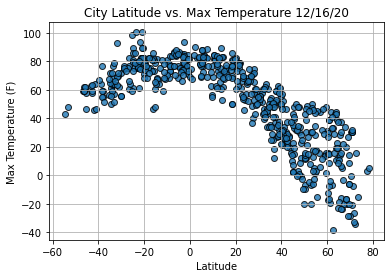

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

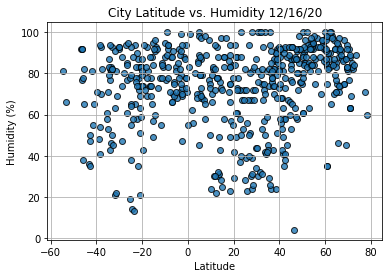

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

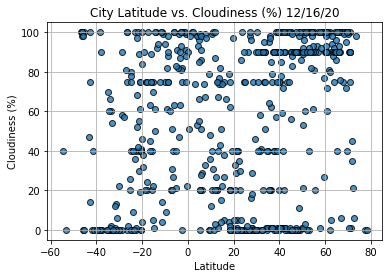

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

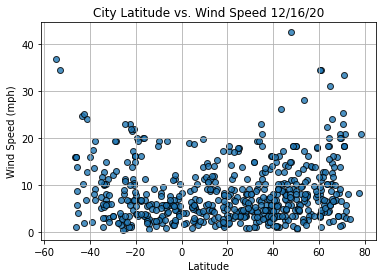

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()